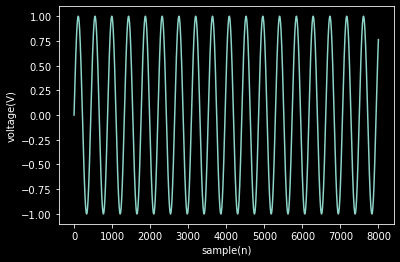

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import math

Fs = 44100
f = 100
sample = 8000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()


In [113]:

def print_wave_file(sample_rate, normalized_data, wave_name):
    time_space = np.linspace(0, len(normalized_data)/sample_rate, num=len(normalized_data))
    plt.figure()
    plt.title("wave " + wave_name)
    plt.xlabel("time (seconds)")
    plt.ylabel("amplitude[" + str(math.floor(normalized_data.min())) + ":" + str(math.ceil(normalized_data.max())) +"] (data)")
    plt.yticks(np.arange(math.floor(normalized_data.min()), math.ceil(normalized_data.max()), 0.1))
    plt.plot(time_space, normalized_data)
    plt.show()

In [96]:
def create_sine(hz, sample_rate, durotian):
    samples = np.arange(sample_rate * durotian) / sample_rate
    return  np.sin(2 * np.pi * hz * samples)

In [100]:
def to_wave(signal, frame_rate, name):
    signal = signal * 32767
    signal = np.int16(signal)
    wavfile.write(name + ".wav", frame_rate, signal)

In [102]:
sine = create_sine(440, 44100, 5)

In [103]:
to_wave(sine, 44100, "sine")


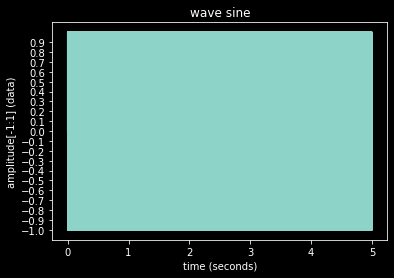

In [114]:
print_wave_file(44100, sine, "sine")

In [119]:
from tqdm import tqdm

def count_fft(data):
    spectra = []
    for i in tqdm(range(0, int((len(data) - frame_width) / spacing))):
        frame = (data[i*spacing:i*spacing+frame_width]) * hamming
        spectra.append(fft(frame))
    return spectra

In [123]:
from scipy.fftpack import fft

frame_width = 2048
hamming = np.hamming(frame_width)
file_path = './chopin-nocturne.wav'
spacing = 2048
count_fft(sine)

100%|██████████| 106/106 [00:00<00:00, 26503.50it/s]


[array([2.3923865 +0.j        , 2.39776444-0.02423089j,
        2.41403264-0.04877525j, ..., 2.4416017 +0.07395892j,
        2.41403264+0.04877525j, 2.39776444+0.02423089j]),
 array([-1.94949963+0.j        , -1.95395715+0.06873888j,
        -1.96744114+0.13837044j, ..., -1.99029219-0.20982282j,
        -1.96744114-0.13837044j, -1.95395715-0.06873888j]),
 array([1.17178243+0.j        , 1.17455392-0.10144084j,
        1.18293781-0.20420024j, ..., 1.19714615+0.30964924j,
        1.18293781+0.20420024j, 1.17455392+0.10144084j]),
 array([-0.19280932+0.j        , -0.19341879+0.11672014j,
        -0.19526263+0.23495825j, ..., -0.19838793-0.35629281j,
        -0.19526263-0.23495825j, -0.19341879-0.11672014j]),
 array([-0.81927916+0.j        , -0.82093639-0.11195252j,
        -0.82594929-0.22536173j, ..., -0.83444379+0.34174239j,
        -0.82594929+0.22536173j, -0.82093639+0.11195252j]),
 array([1.69065486+0.j        , 1.69429416+0.08795685j,
        1.70530282+0.1770589j , ..., 1.72395818-0.2